<a href="https://colab.research.google.com/github/santoshkumarbvp/Deep-Learning/blob/main/MNIST_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [68]:
x_test.shape, x_train.shape, y_test.shape, y_train.shape

((10000, 28, 28), (60000, 28, 28), (10000, 10), (60000, 10))

(<matplotlib.image.AxesImage at 0x7f8e66610a90>, 0)

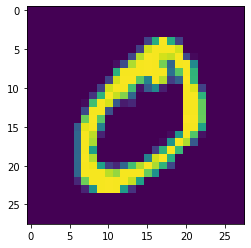

In [9]:
plt.imshow(x_train[1],), y_train[1]

**Labels should change to one hot encoder**



In [10]:
y_test  # this should change to one hot encoding

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
le = OneHotEncoder()


In [64]:
y_train = le.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = le.transform(y_test.reshape(-1,1)).toarray()

In [66]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [70]:
x_train = x_train/255
x_test = x_test/255

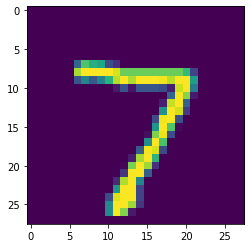

In [73]:
# scaling will not change the image'
plt.imshow(x_test[0])

In [74]:
# reshaping the image

In [75]:
x_train = x_train.reshape(60000, 28,28,1)

In [86]:
x_test = np.expand_dims(x_test,axis=-1)

In [88]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [89]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential

In [112]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(120, activation='relu'))

model.add(Dense(10,activation='softmax'))

In [113]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 120)               752760    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1210      
Total params: 754,514
Trainable params: 754,514
Non-trainable params: 0
_________________________________________________________________


In [120]:
120*6272 + 120

752760

Lets discuss about the parameters at each layer to have clear picture of neural network.



> 1.   first convolution layer : 
> Input image is 28,28 and it has total 32 kernals with size 4,4
> so, calculation would be ( weight + bias ) =  **(4 \* 4 \* 32 \+ 32) = 544**
2.   Output size of the image would be : as kernal_size is even, so algorithm adjust itself to make sure that output_shape is same as input_shape(28\*28).
> 3. At second layer(MaxPool): no parameter to learn, but image size reduces. stride is same as pool_size in case of maxpool.
>  **((28 - 2) / 2 ) + 1 = 14**
> 4. At third layer(Flatten): no parameter. only shape gets updated. just mulitplying all the dimensions. **(14 \*14 \*32) = 6272**
> 5. at fourth layer( dense ) : it has 120 neurons and last layer has 6272. So parameter would be **120\*6272 + 120 = 752760** 
> 6. last layer has 10 neurons: **10\*120 + 120 = 1210** 


